# Numpy Matrices and Matplotlib new stuff

Create a list of numbers and plot them.

In [1]:
42


42

In [9]:
grades = [70.2, 66, 80.3, 95.2, 80, 91]

In [5]:
grades

[70.2, 66, 80.3, 95.2, 80, 91, 'hi']

In [6]:
print(grades)

[70.2, 66, 80.3, 95.2, 80, 91, 'hi']


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

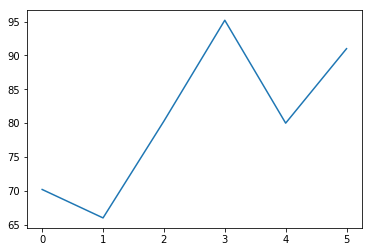

In [11]:
plt.plot(grades);

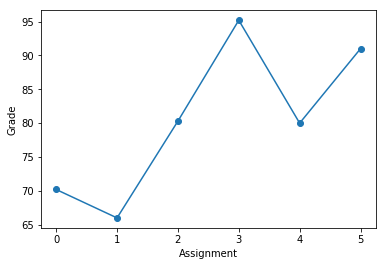

In [12]:
plt.plot(grades,'-o')
plt.xlabel('Assignment')
plt.ylabel('Grade')

How about data showing miles-per-gallon for cars manufactured in particular years?

In [14]:
mpg = [22, 25, 20, 32, 19, 42, 28]
mpg

[22, 25, 20, 32, 19, 42, 28]

But, what about the years?

In [15]:
years = [2010, 2012, 2013, 2012, 1999, 2014, 2004]
years

[2010, 2012, 2013, 2012, 1999, 2014, 2004]

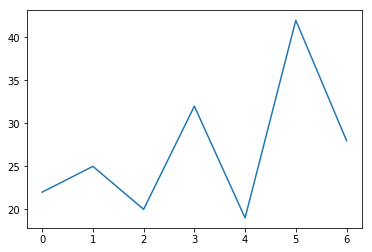

In [16]:
plt.plot(mpg)

Not really what we want.  Want to plot mpg on y axis and year on x axis.

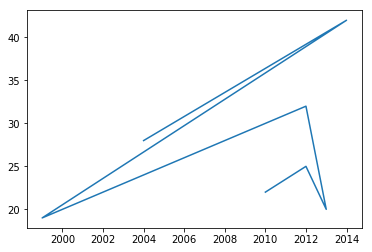

In [17]:
plt.plot(years, mpg)

In [18]:
years

[2010, 2012, 2013, 2012, 1999, 2014, 2004]

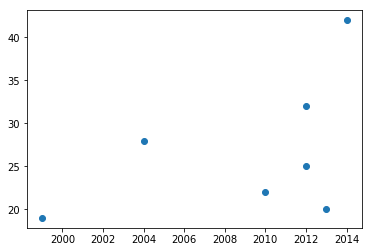

In [19]:
plt.plot(years, mpg,'o')

Is there a linear relationship here?  How can I draw a line through this graph and play with its parameters?

In [21]:
def line(x, slope, yintercept):
    return x * slope + yintercept

In [22]:
s = 3
yint = -5990
line(1998, s, yint)

4

In [23]:
line(2014, s, yint)

52

In [24]:
for y in years:
    print(y)

2010
2012
2013
2012
1999
2014
2004


In [25]:
ys = []
for y in years:
    ys.append(line(y, s, yint))
ys

[40, 46, 49, 46, 7, 52, 22]

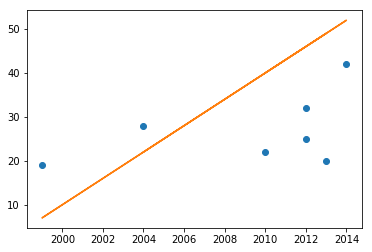

In [26]:
plt.plot(years, mpg, 'o')
plt.plot(years, ys)

Wow! That's a pain!  First of all, let's jump into the wonderful world of matrices.  We can often replace for loops with single matrix calculations.

In [27]:
import numpy as np

In [28]:
mpg = np.array([22, 25, 20, 32, 19, 42, 28])
mpg

array([22, 25, 20, 32, 19, 42, 28])

In [29]:
years = np.array([2010, 2012, 2013, 2012, 1999, 2014, 2004])
years

array([2010, 2012, 2013, 2012, 1999, 2014, 2004])

Watch this!  Our function, ```line```, just returns ```x * slope + yintercept```.  If each of these variables actually contain ```numpy``` arrays of the same shape, the operations will automatically be applied component-wise. 

In [30]:
line(years, s, yint)

array([40, 46, 49, 46,  7, 52, 22])

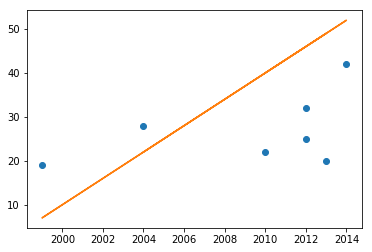

In [33]:
plt.plot(years, mpg, 'o')
plt.plot(years, line(years, s, yint))

Works, but remember the x values are not in order.  If all values did not fall in a line, we would not see a nice function plot.  We can make this more obvious by adding some noise to each estimated y value.

In [37]:
np.random.rand(5)

array([ 0.78438157,  0.40085623,  0.56611822,  0.46844871,  0.79880259])

In [ ]:
plt.plot(years, line(years, s, yint) + np.random.rand?

In [38]:
years.shape

(7,)

In [39]:
np.random.rand(7) * 10

array([ 6.58075188,  4.86190617,  6.69217929,  7.33451778,  5.49714337,
        7.25997226,  1.85575394])

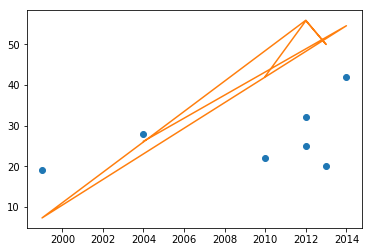

In [41]:
plt.plot(years, mpg, 'o')
plt.plot(years, line(years, s, yint) + np.random.rand(7)*10)

Now it is clear we need to order our data by year. 

In [42]:
print(np.sort(years))
years

[1999 2004 2010 2012 2012 2013 2014]


array([2010, 2012, 2013, 2012, 1999, 2014, 2004])

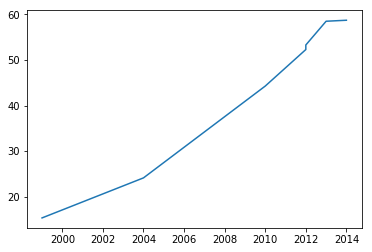

In [44]:
yearsSorted = np.sort(years)
plt.plot(yearsSorted, line(yearsSorted, s, yint) + np.random.rand(7)*10)

In [ ]:
yearsSorted = np.sort(years)
plt.plot(yearsSorted, line(yearsSorted, s, yint), 'o-')

Now it is clear we need to order our data by year.  But we have two (parallel) arrays.  Can find order of indices that will arrange years in ascending order, and apply the indices to the years.

In [45]:
order = np.argsort(years)
order

array([4, 6, 0, 1, 3, 2, 5])

In [46]:
years

array([2010, 2012, 2013, 2012, 1999, 2014, 2004])

In [48]:
years[0:3]

array([2010, 2012, 2013])

In [51]:
years, mpg

(array([2010, 2012, 2013, 2012, 1999, 2014, 2004]),
 array([22, 25, 20, 32, 19, 42, 28]))

In [50]:
years[order], mpg[order]

(array([1999, 2004, 2010, 2012, 2012, 2013, 2014]),
 array([19, 28, 22, 25, 32, 20, 42]))

It is too easy to make errors with parallel arrays.  Instead, let's combine our year-mpg samples into a matrix with each row being one sample.

In [52]:
np.stack((years, mpg))

array([[2010, 2012, 2013, 2012, 1999, 2014, 2004],
       [  22,   25,   20,   32,   19,   42,   28]])

In [ ]:
np.stack?

In [53]:
np.stack((years, mpg), axis=1)

array([[2010,   22],
       [2012,   25],
       [2013,   20],
       [2012,   32],
       [1999,   19],
       [2014,   42],
       [2004,   28]])

In [54]:
data = np.stack((years, mpg), axis=1)

In [55]:
data[0, 0]

2010

In [56]:
data[0, :]

array([2010,   22])

In [57]:
data[:, 0]

array([2010, 2012, 2013, 2012, 1999, 2014, 2004])

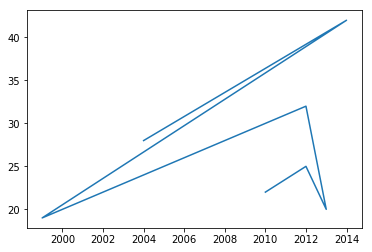

In [58]:
plt.plot(data[:, 0], data[:, 1])

In [ ]:
order = np.sort?

In [ ]:
order = np.sort

In [59]:
order = np.argsort(data[:, 0])
order

array([4, 6, 0, 1, 3, 2, 5])

In [60]:
data[order, :]

array([[1999,   19],
       [2004,   28],
       [2010,   22],
       [2012,   25],
       [2012,   32],
       [2013,   20],
       [2014,   42]])

In [61]:
data = data[np.argsort(data[: ,0]), :]

In [62]:
data

array([[1999,   19],
       [2004,   28],
       [2010,   22],
       [2012,   25],
       [2012,   32],
       [2013,   20],
       [2014,   42]])

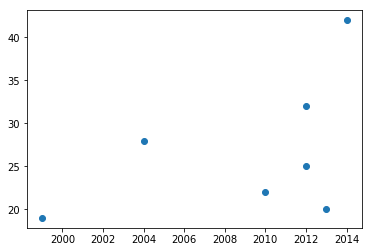

In [63]:
plt.plot(data[:, 0], data[:, 1], 'o');

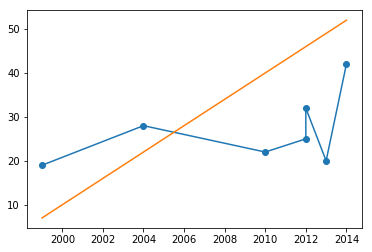

In [64]:
plt.plot(data[:, 0], data[:, 1], '-o');
plt.plot(data[:, 0], line(data[:, 0], s, yint));

Now, we have the basics of defining functions, collecting data samples in a matrix, and plotting them.  Time to automate the fitting of a line to the data&ndash;linear regression!